# Internet Of Water SPARQL

A simple document to explore IoW queries




In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import numpy as np
import json
import geopandas
import matplotlib.pyplot as plt
import shapely

# set SPARQL endpoint(s)
iow = "https://graph.geoconnex.us/repositories/iow"


In [2]:
#@title
def get_sparql_dataframe(service, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    sparql = SPARQLWrapper(service)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

In [3]:
cq = """
SELECT (COUNT(*) as ?Count)
WHERE
  {
      { ?s ?p ?o }
  }
"""

dfsc = get_sparql_dataframe(iow, cq)
dfsc.head()

,Count
0,5806044


## Explore Property Paths

Reference issue [issues 16](https://github.com/internetofwater/harvest.geoconnex.us/issues/16)

[GraphDB Property Paths](https://www.ontotext.com/blog/graphdb-levels-the-field-between-rdf-and-property-graphs/)
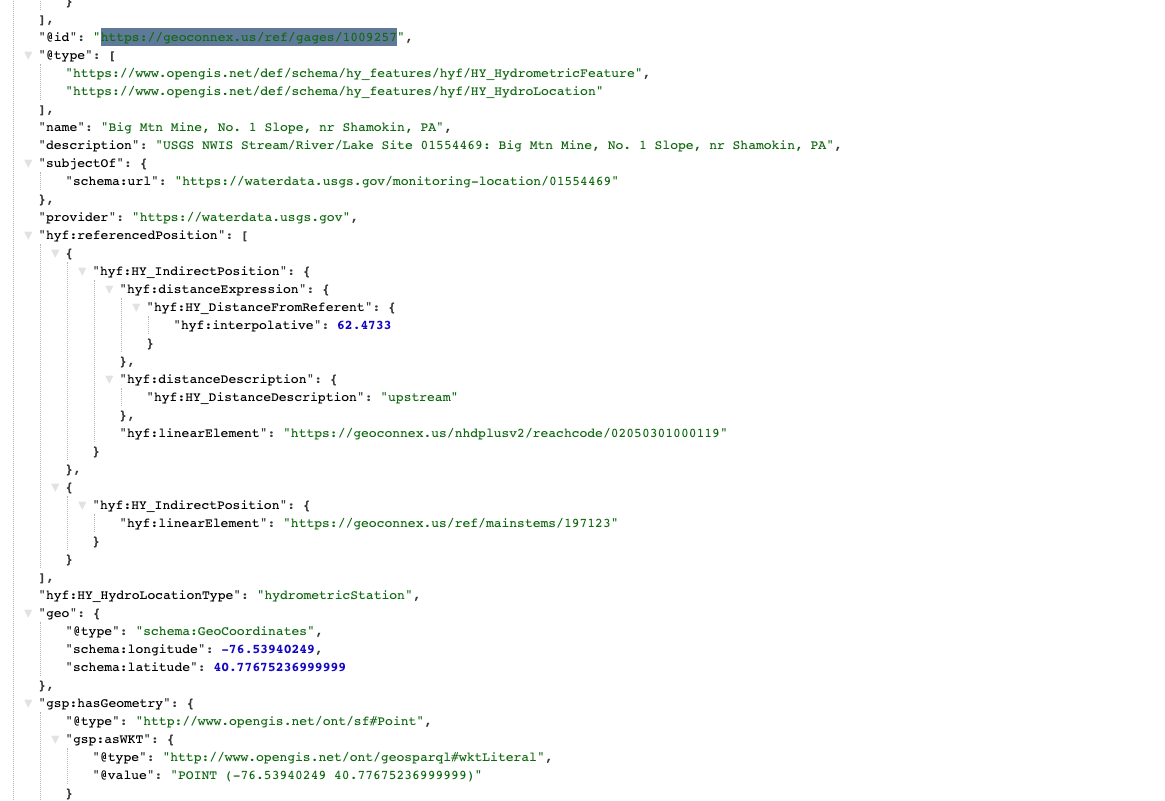
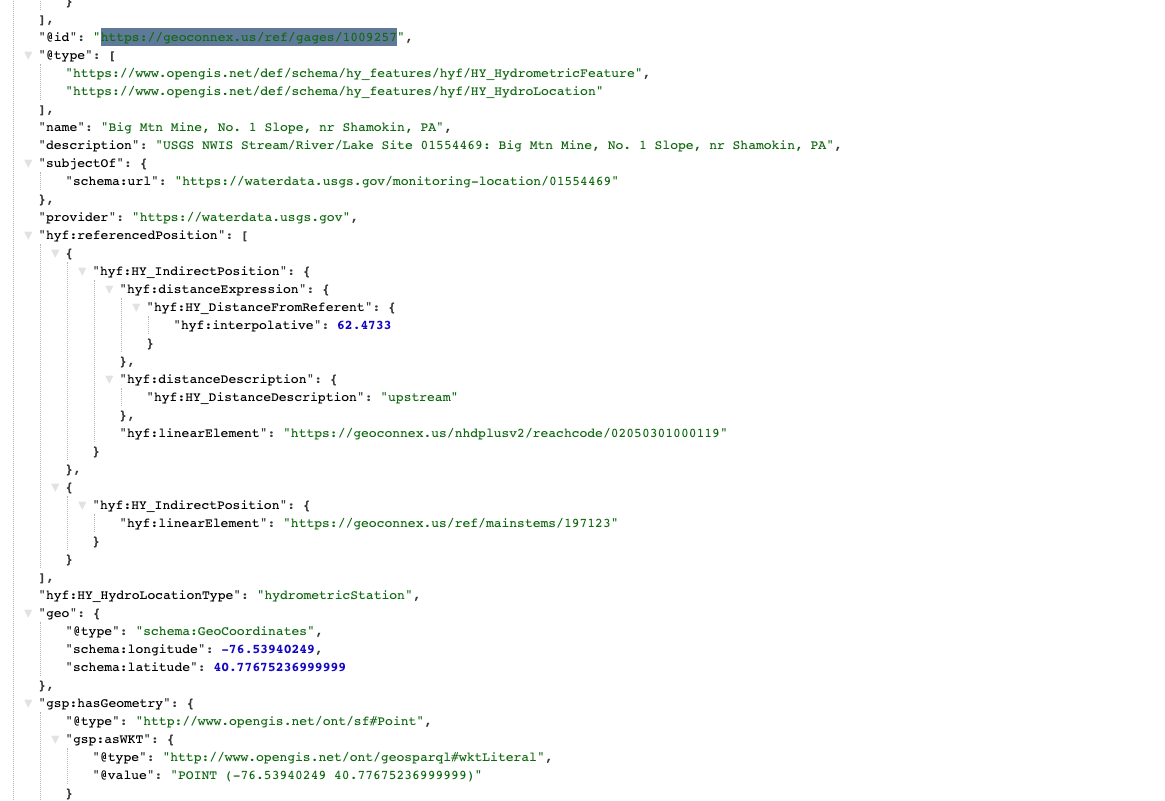

In [6]:
cq = """
PREFIX luc: <http://www.ontotext.com/connectors/lucene#>
PREFIX luc-index: <http://www.ontotext.com/connectors/lucene/instance#>
PREFIX schema: <https://schema.org/>
        
SELECT ?s ?score ?name ?desc ?label {
    ?search a luc-index:combined_two ;
        luc:query "iowa rivers" ;
        luc:entities ?s .
        ?s luc:score ?score .
            
        OPTIONAL { ?s schema:name ?name . }
        OPTIONAL { ?s schema:description ?desc . }
        OPTIONAL { ?s <http://www.w3.org/2000/01/rdf-schema#label> ?label .}
}
"""


cq2 = """
PREFIX luc: <http://www.ontotext.com/connectors/lucene#>
        PREFIX luc-index: <http://www.ontotext.com/connectors/lucene/instance#>
        PREFIX schema: <https://schema.org/>

        SELECT ?s ?score ?name ?desc ?label {
          ?search a luc-index:combined_two ;
              luc:query "colorado" ;
              luc:entities ?s .
              ?s luc:score ?score .

            OPTIONAL { ?s schema:name ?name . }
            OPTIONAL { ?s schema:description ?desc . }
            OPTIONAL { ?s <http://www.w3.org/2000/01/rdf-schema#label> ?label .}
        }

"""


dfsc = get_sparql_dataframe(iow, cq2)
dfsc.head()


,s,score,name,desc,label
0,https://geoconnex.us/ref/gages/1012193,8.015030860900879,COLORADO C NR COLORADO AK,USGS NWIS Stream/River/Lake Site 6316291493520...,None
1,https://geoconnex.us/ref/gages/1050745,7.721399307250977,"Colorado Rv at Colorado City, TX",USGS NWIS Stream/River/Lake Site 08121000: Col...,None
2,https://geoconnex.us/ref/gages/1026984,7.452178001403809,COLORADO RIVER NEAR COLORADO-UTAH STATE LINE,USGS NWIS Stream/River/Lake Site 09163500: COL...,None
3,https://geoconnex.us/ref/gages/1027044,7.452178001403809,COLORADO RIVER BELOW COLORADO-UTAH STATE LINE,USGS NWIS Stream/River/Lake Site 09163530: COL...,None
4,https://geoconnex.us/ref/gages/1048188,7.452178001403809,"Lk Colorado City nr Colorado City, TX",USGS NWIS Stream/River/Lake Site 08123000: Lk ...,None


The text for the link:

"monitoring locations on the same reference mainstem"

In [5]:
cq = """
PREFIX hyf: <https://www.opengis.net/def/schema/hy_features/hyf/>

select ?le ?relsubjects  where {
    <https://geoconnex.us/ref/gages/1118104> hyf:referencedPosition ?rp .
    ?rp hyf:HY_IndirectPosition ?ip .
    ?ip hyf:linearElement ?le .
    BIND (?le as ?target)
    ?relsubjects hyf:referencedPosition ?rp2 .
    ?rp2 hyf:HY_IndirectPosition ?ip2.
    ?ip2 hyf:linearElement ?target .
}

"""

dfsc = get_sparql_dataframe(iow, cq)
dfsc.head()

,le,relsubjects
0,https://geoconnex.us/ref/mainstems/324976,https://geoconnex.us/ref/gages/1118105
1,https://geoconnex.us/ref/mainstems/324976,https://geoconnex.us/ref/gages/1067246
2,https://geoconnex.us/ref/mainstems/324976,https://geoconnex.us/ref/gages/1030542
3,https://geoconnex.us/ref/mainstems/324976,https://geoconnex.us/ref/gages/1118115
4,https://geoconnex.us/ref/mainstems/324976,https://geoconnex.us/ref/gages/1017821
